<div style="background-color: #FFF3E0; color: #495057; padding: 20px; border-radius: 10px; font-family: 'Source Code Pro', monospace;border-radius: 15px 50px;">

  <h2 style="text-align: center;">🚗 Ride Pricing Precision - Dynamic Pricing with Machine Learning 📈</h2>
    <br/>
    <h3>Abstract :</h3>
  <p>The major challenge faced by the ride-sharing company is the optimization of pricing strategies with dynamic changes in the market but simultaneously the requirements of enhancing customer experience and maximizing revenue. The current practice of setting the fares based solely on ride duration fails to capture refinement in demand fluctuations, competitive pricing, and other contextual factors that one may not be able to explain in any length.</p>

  <p>Through this dynamic pricing model, the company will help achieve the following objectives:</p>

  <ul>
    <li>Maximize Revenue: Maximize the revenue generated through the pricing model by accurately predicting an optimal fare based on real-time market conditions, thereby being able to capture value at different levels of demand.</li>
    <li>Customer Satisfaction: With competitive and dynamically adjusted fares, the company will augment customer satisfaction and loyalty, thereby achieving high retention and positive brand perception.</li>
    <li>Operational Efficiency: The streamlining of the pricing process and the use of machine learning algorithms will ensure that companies stay efficient in terms of how resources are deployed, thereby achieving cost savings and improved profit margins.</li>
    <li>Competitiveness: Companies in this marketplace and rapidly changing consumer preferences must be able to innovate and adapt accordingly.</li>
  </ul>

  <p>By implementing dynamic pricing powered by machine learning, the company will ensure that the dynamic pricing model remains agile and responsive to changing dynamics in the market. This approach will result in gaining a competitive advantage over competitors.</p>

  <img src="https://static.wixstatic.com/media/3eee0b_8740d2b1c0b74f77a55436179838ff52~mv2.gif" alt="Alt Text" style="display: block; margin-left: auto; margin-right: auto;">

</div>


<div style="background-color: #EBF5FB; color: #495057; padding: 20px; border-radius: 10px; font-family: 'Source Code Pro', monospace;border-radius: 15px 50px;">

  <h1 style="text-align: center;">🚀 Introduction 🤖</h1>

  <p>Business strategy has always been about innovation and adaptability. Dynamic pricing is a testament to this never-ending pursuit: prices can be adjusted in real-time in response to changes in demand or competition, and dynamic prices are the result of several factors shifting, all occurring in real-time. Using machine learning and data-driven methodologies, the business does not have to adjust its pricing strategy on its own; it simply uses the changing patterns of all market factors and decides, in real-time, how to adjust its pricing strategy.</p>

  <p>We will be focusing on the application of price optimization through dynamic pricing and machine learning in this notebook. We will take a look at the dataset provided by a ride-sharing company, which traditionally determined fares based solely on ride duration. Thus, we will look at the limitations of static pricing strategies in the wake of dynamic market landscapes. Our attempt will be to create a dynamic pricing model using the application of data-driven techniques that can quickly adjust the structures of the ride fee according to the prevailing market conditions, including riding and driving counts, a site's location demographic, customer loyalty score, ride history, satisfaction ratings, booking time, vehicle type, ride duration, historical cost data, and any other feature deemed important by businesses.</p>

  <h2 style="text-align: center;">🎯 Methodology 📈</h2>

  <ul>
    <li><b>Data Collection and Preprocessing:</b> Extract proper datasets for diverse data sources with preprocessing, and close the gaps between them. Let's include missing data, categorical variable encoding, and numerical feature normalization in the dataset.</li>
    <li><b>Feature Engineering:</b> Here, we can get some relevant features and even engineer them to develop a predictive model with our model, keeping in mind how the assumptions of demand can be changed and how changes in supply can be reflected.</li>
    <li><b>Model Selection:</b> We explore different ML algorithms and try to identify the best model to predict dynamic prices. Here we will be using types of regression along with ensemble models.</li>
    <li><b>Model Training and Evaluation:</b> We will train our selected model on our preprocessed dataset and subject it to rigorous evaluation using metrics like mean absolute error and root mean squared error.</li>
    <li><b>Dynamic Pricing Implementation:</b> Here, we are going to implement the trained model to dynamically change the fare structure of each ride in real-time for generating an optimal price.</li>
  </ul>

</div>


In [1]:
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import joblib
from scipy.stats import boxcox_normmax
from scipy.special import boxcox1p


warnings.filterwarnings("ignore")

<div style="background-color: #F2DFDB; color: #495057; padding: 20px; border-radius: 10px; font-family: 'Source Code Pro', monospace; border-radius: 15px 50px;">

  <h2 style="text-align: center;">🔮Project Overview 🔮</h2>

  <ul>
    <li><strong>Data Loading:</strong> Retrieve the dataset from a file or source and load it into a DataFrame for analysis.</li>
    <li><strong>Data Preparation:</strong> Address any missing or incorrect data, convert data types as needed, and ensure the dataset is clean and ready for analysis.</li>
    <li><strong>Exploratory Data Analysis (EDA):</strong> Investigate the dataset to uncover insights into its distribution, correlations, and patterns. Utilize visualizations to highlight important features and relationships.</li>
    <li><strong>Feature Engineering:</strong> Enhance the dataset's predictive power by creating new features or transforming existing ones.</li>
    <li><strong>Data Splitting:</strong> Divide the dataset into input features (X) and target variable (y) to facilitate model training.</li>
    <li><strong>Model Training:</strong> Employ machine learning algorithms to train a predictive model using the training data.</li>
    <li><strong>Model Evaluation:</strong> Assess the performance of the trained model using relevant metrics and evaluation techniques.</li>
  </ul>

  <h2 style="text-align: center;">📊 Dataset 📊</h2>
  <p>The dataset at our disposal is historical ride information and forms the basis of our dynamic pricing endeavors. This data collection comprises several features, from rider/driver counts, location categories, and customer loyalty statuses to ride history, satisfaction ratings, booking times, vehicle specifications, ride durations, and historical costs. This dataset provides the raw materials essential to craft our dynamic pricing model.</p>

</div>


In [2]:
data = pd.read_csv("data/dynamic_pricing.csv")
data.head()

Number_of_Riders  Number_of_Drivers Location_Category  \
0                90                 45             Urban   
1                58                 39          Suburban   
2                42                 31             Rural   
3                89                 28             Rural   
4                78                 22             Rural   

  Customer_Loyalty_Status  Number_of_Past_Rides  Average_Ratings  \
0                  Silver                    13             4.47   
1                  Silver                    72             4.06   
2                  Silver                     0             3.99   
3                 Regular                    67             4.31   
4                 Regular                    74             3.77   

  Time_of_Booking Vehicle_Type  Expected_Ride_Duration  \
0           Night      Premium                      90   
1         Evening      Economy                      43   
2       Afternoon      Premium                      76   
3       Afternoon      Premium                     134   
4       Afternoon      Economy                     149   

   Historical_Cost_of_Ride  
0               284.257273  
1               173.874753  
2               329.795469  
3               470.201232  
4               579.681422

<div style="background-color: #ffe4e1; color: #495057; padding: 20px; border-radius: 10px; font-family: 'Source Code Pro', monospace;border-radius: 15px 50px;">
    <h2 style="text-align: center;">📊 Data Preprocessing 🔧</h2>
</div>

In [3]:
# Displaying concise summary information about the DataFrame, including
# data types, non-null values, and memory usage
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Number_of_Riders         1000 non-null   int64  
 1   Number_of_Drivers        1000 non-null   int64  
 2   Location_Category        1000 non-null   object 
 3   Customer_Loyalty_Status  1000 non-null   object 
 4   Number_of_Past_Rides     1000 non-null   int64  
 5   Average_Ratings          1000 non-null   float64
 6   Time_of_Booking          1000 non-null   object 
 7   Vehicle_Type             1000 non-null   object 
 8   Expected_Ride_Duration   1000 non-null   int64  
 9   Historical_Cost_of_Ride  1000 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 78.3+ KB


In [4]:
# Displaying the data types of each column in the DataFrame
data.dtypes

Number_of_Riders             int64
Number_of_Drivers            int64
Location_Category           object
Customer_Loyalty_Status     object
Number_of_Past_Rides         int64
Average_Ratings            float64
Time_of_Booking             object
Vehicle_Type                object
Expected_Ride_Duration       int64
Historical_Cost_of_Ride    float64
dtype: object

In [5]:
# Counting the number of duplicated rows in the DataFrame and then counting
# the frequency of those counts to summarize the distribution of duplicated rows
data.duplicated().value_counts()

False    1000
Name: count, dtype: int64

<div style="background-color: #EDF7B6; color: #495057; padding: 20px; border-radius: 10px; font-family: 'Source Code Pro', monospace;border-radius: 15px 50px;">

  <h2 style="text-align: center;">📊 Exploratory Data Analysis (EDA) 🔍</h2>

  <p>In lack of a complete column description we need to make some assumptions. For the further analysis we assume the following:</p>

  <ul>
    <li><strong>Number_of_Riders:</strong> The number of riders available at the time of booking, reflecting the market situation.</li>
    <li><strong>Number_of_Drivers:</strong> The number of drivers available at the time of booking, reflecting the market situation.</li>
    <li><strong>Location_Category:</strong> The category representing the geographical location where the ride was booked, such as Urban, Suburban, or Rural.</li>
    <li><strong>Customer_Loyalty_Status:</strong> The loyalty status of the customer towards the ride-sharing company, indicating whether the customer is a regular user or enrolled in a loyalty program.</li>
    <li><strong>Number_of_Past_Rides:</strong> The number of past rides taken by the customer, indicating their experience and familiarity with the service.</li>
    <li><strong>Average_Ratings:</strong> The average rating given by the customer for past rides, reflecting customer satisfaction and feedback.</li>
    <li><strong>Time_of_Booking:</strong> The time of the day when the ride was booked, categorized into different time slots such as Morning, Afternoon, Evening, or Night.</li>
    <li><strong>Vehicle_Type:</strong> The type of vehicle used for the ride, such as Premium, Economy, or other classes.</li>
    <li><strong>Expected_Ride_Duration:</strong> The expected duration of the ride in minutes.</li>
    <li><strong>Historical_Cost_of_Ride:</strong> The historical cost of past rides, indicating pricing patterns and customer spending.</li>
  </ul>

</div>


In [6]:
# Generate descriptive statistics for all numerical columns
data.describe()

Number_of_Riders  Number_of_Drivers  Number_of_Past_Rides  \
count       1000.000000        1000.000000           1000.000000   
mean          60.372000          27.076000             50.031000   
std           23.701506          19.068346             29.313774   
min           20.000000           5.000000              0.000000   
25%           40.000000          11.000000             25.000000   
50%           60.000000          22.000000             51.000000   
75%           81.000000          38.000000             75.000000   
max          100.000000          89.000000            100.000000   

       Average_Ratings  Expected_Ride_Duration  Historical_Cost_of_Ride  
count      1000.000000              1000.00000              1000.000000  
mean          4.257220                99.58800               372.502623  
std           0.435781                49.16545               187.158756  
min           3.500000                10.00000                25.993449  
25%           3.870000                59.75000               221.365202  
50%           4.270000               102.00000               362.019426  
75%           4.632500               143.00000               510.497504  
max           5.000000               180.00000               836.116419

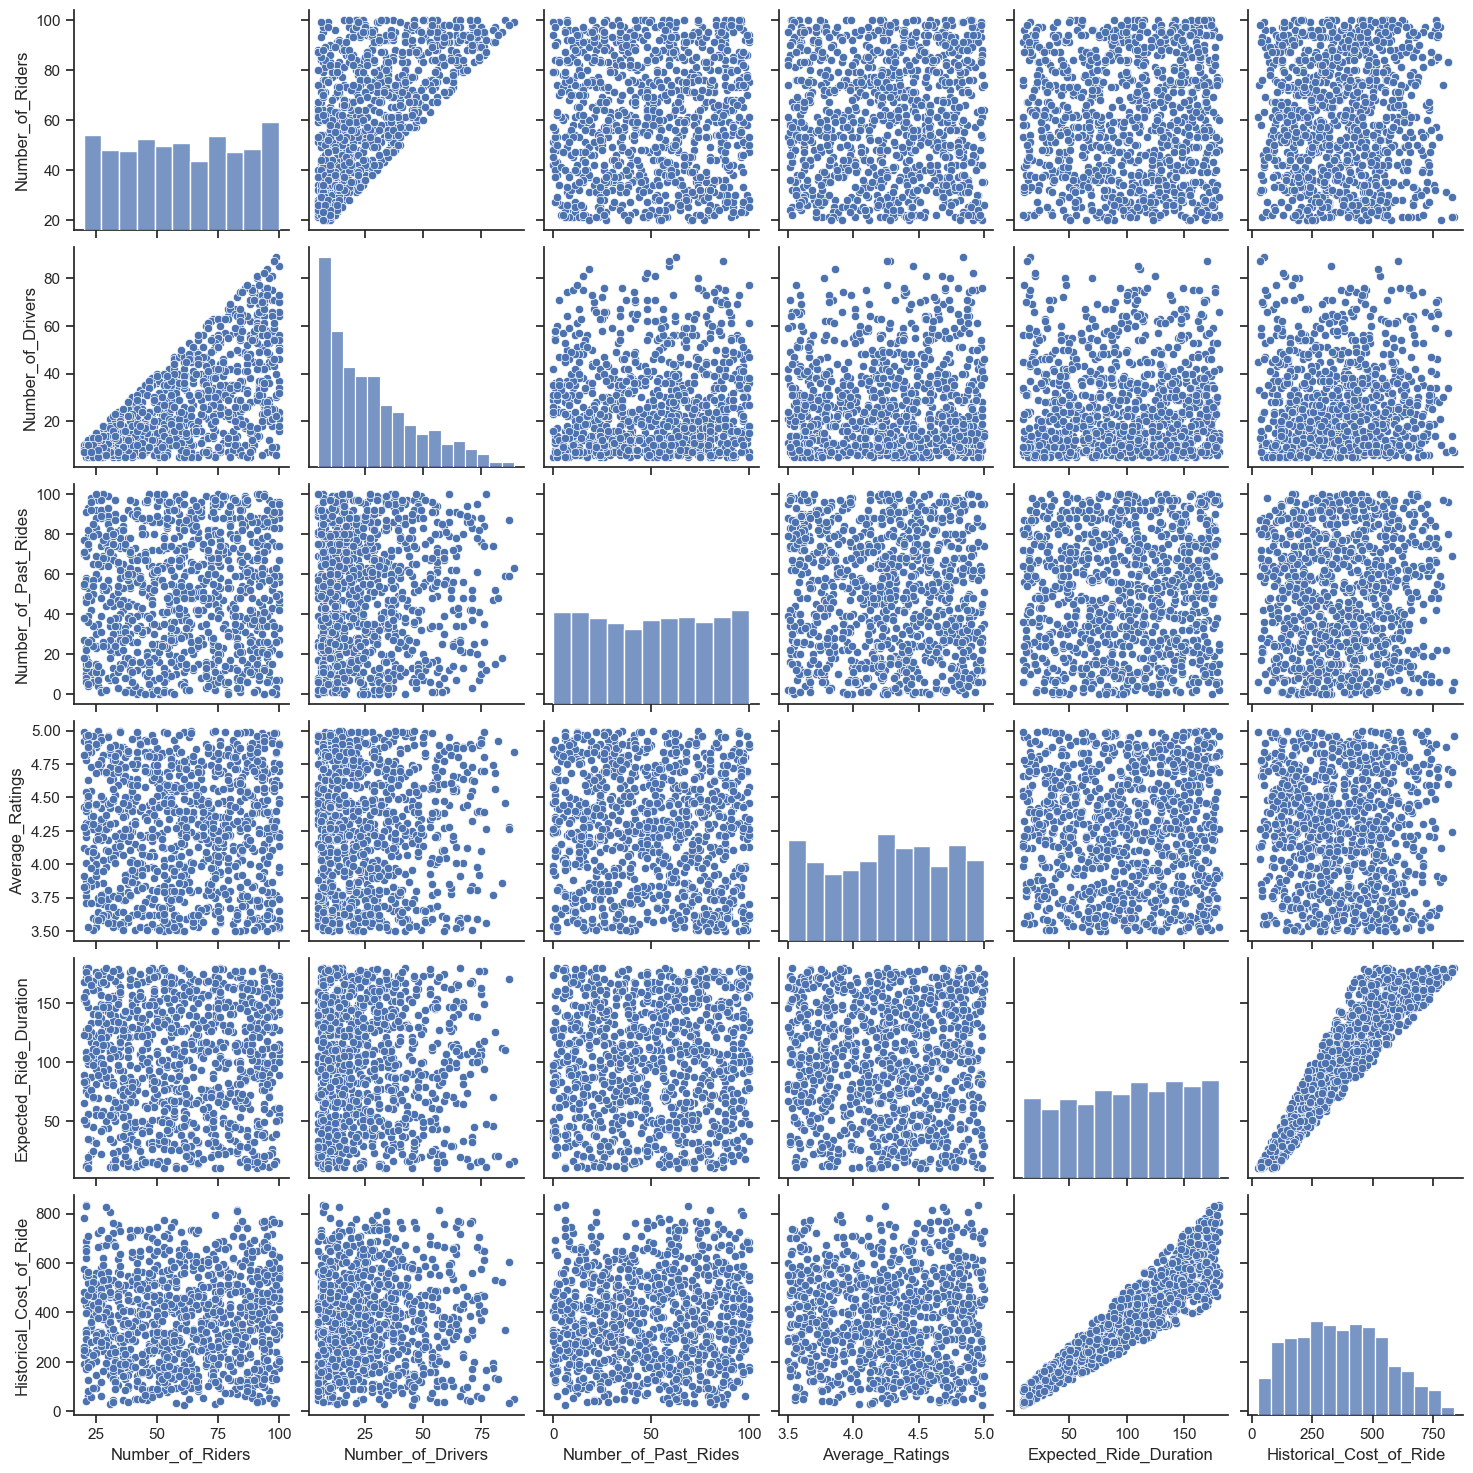

In [7]:
numerical_data = data[['Number_of_Riders', 'Number_of_Drivers', 'Number_of_Past_Rides', 
                       'Average_Ratings', 'Expected_Ride_Duration', 'Historical_Cost_of_Ride']]

cat = ['Location_Category', 'Customer_Loyalty_Status', 'Time_of_Booking', 'Vehicle_Type']

sns.set(style="ticks")

sns.pairplot(numerical_data, palette=["#1f77b4"])

plt.show()

<div style="background-color: #EAFBE2; color: #495057; padding: 20px; border-radius: 10px; font-family: 'Source Code Pro', monospace;border-radius: 15px 50px;">

  <h2 style="text-align: center;">🔍 Observations from Pair Plot</h2>

  <ul>
    <li>There seems to exist a positive correlation between the number of riders and the number of past rides. In other words, it tends that as the number of riders increases, the number of past rides also tends to increase.</li>
    <li>There appears to be a low positive correlation between the expected ride duration and historical cost of the ride. Specifically, an increase in expected ride duration tends to go with an increase in historical cost of the ride.</li>
    <li>There does not seem to be any significant correlation between the number of drivers and any of the other variables.</li>
  </ul>

</div>

In [8]:
# Create a scatter plot of Expected Ride Duration vs. Historical Cost of Ride with trendline

fig = px.scatter(data, x='Expected_Ride_Duration', y='Historical_Cost_of_Ride', trendline='ols', 
                 title='Scatterplot of Expected Ride Duration vs. Historical Cost of Ride with Trendline')

fig.update_traces(selector=dict(type='scatter', mode='lines'), line=dict(color='Red'))
fig.update_traces(marker=dict(color='#1f77b4'))
fig.update_layout(xaxis_title='Expected Ride Duration', yaxis_title='Historical Cost of Ride')

fig.show()

<div style="background-color: #EAFBE2; color: #495057; padding: 20px; border-radius: 10px; font-family: 'Source Code Pro', monospace;border-radius: 15px 50px;">

  <h2 style="text-align: center;">🔍 Observations from Pair Plot</h2>

  <p>There appears to be a positive correlation between the expected hike duration and the historical cost of the hike. This means that as the expected hike duration gets longer, the historical cost of the hike also tends to be higher. The trendline further confirms this positive correlation.</p>

</div>

In [9]:
#This graph visualizes the distribution of historical costs of rides across different categorical variables

colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"]

fig = go.Figure()
fig.add_trace(go.Box(x=data['Location_Category'], y=data['Historical_Cost_of_Ride'], marker=dict(color=colors[0]), name="Location Category"))
fig.add_trace(go.Box(x=data['Customer_Loyalty_Status'], y=data['Historical_Cost_of_Ride'], marker=dict(color=colors[1]), name="Customer Loyalty Status"))
fig.add_trace(go.Box(x=data['Time_of_Booking'], y=data['Historical_Cost_of_Ride'], marker=dict(color=colors[2]), name="Time of Booking"))
fig.add_trace(go.Box(x=data['Vehicle_Type'], y=data['Historical_Cost_of_Ride'], marker=dict(color=colors[3]), name="Vehicle Type"))

fig.update_layout(title="Boxplots of Historical Cost of Ride by Categorical Variables", 
                  xaxis=dict(title="Category"),
                  yaxis=dict(title="Historical Cost of Ride"))

fig.show()


<div style="background-color: #EAFBE2; color: #495057; padding: 20px; border-radius: 10px; font-family: 'Source Code Pro', monospace;border-radius: 15px 50px;">

  <h2 style="text-align: center;">🔍 Observations from Boxplot</h2>

  <ul>
    <li>The cost of rides is also higher for premium vehicles than for economy vehicles. This is likely due to the fact that premium vehicles are typically larger and more comfortable than economy vehicles.</li>
    <li>Rides cost more at night compared to the day. This probably occurs because at night, there is less competing transport to compete with, such as the taxi or the public vehicle system.</li>
  </ul>

</div>


In [10]:
#This graph displays bar plots for each categorical variable in the dataset

colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"]

fig = px.bar()
# Iterate over categorical variables and their corresponding colors
for i, (c, color) in enumerate(zip(cat, colors), 1):
    c_counts = data[c].value_counts()
    fig.add_bar(x=c_counts.index, y=c_counts.values, name=c, marker_color=color,opacity=0.5)

fig.update_layout(title="Barplots of Categorical Variables",
                  xaxis_title="Category",
                  yaxis_title="Count")

fig.show()

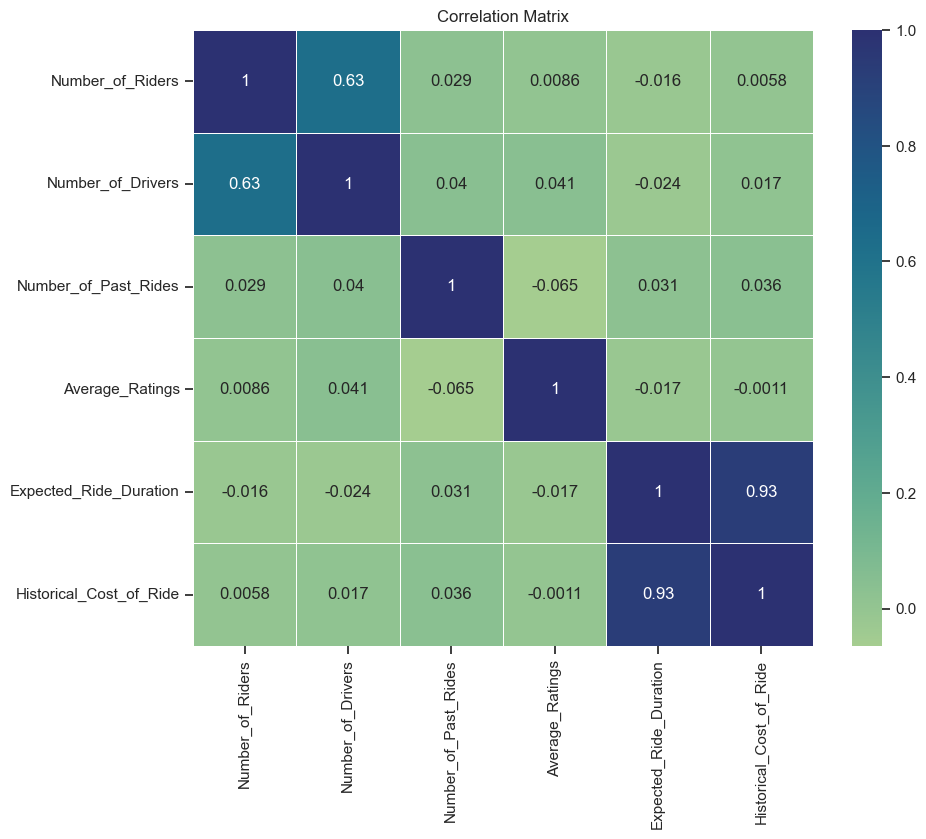

In [11]:
correlation_matrix = numerical_data.corr()

plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='crest', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

<div style="background-color: #ffe4e1; color: #495057; padding: 20px; border-radius: 10px; font-family: 'Source Code Pro', monospace;border-radius: 15px 50px;">

  <h2 style="text-align: center;">🎯 Feature Engineering 🔧</h2>

  <ul>
    <li>Converted categorical variables into dummy variables using one-hot encoding technique.</li>
    <li>Expanded the dataset by creating binary columns for each category within categorical variables.</li>
    <li>Transformed categorical variables into numerical format suitable for machine learning algorithms.</li>
    <li>Added new features representing the presence or absence of each category within categorical variables.</li>
  </ul>
<h2 style="text-align: center;"> 📈 Dynamic Price Adjustments 🔧</h2>

  <h3>Demand Multiplier Calculation:</h3>
  <p>The demand-multiplier and low-demand-multiplier are defined and set the percentiles for high and low demand, respectively. Based on the percentile for high and low demand, the demand-multiplier is determined based on each ride. This is done by comparing the number of riders to the respective high and low demand percentiles. If the number of riders is higher than the high demand percentile, it divides the number of riders by the value of the high-demand percentile. If it is less than the low-demand percentile, it divides by the value of the low-demand percentile.</p>

  <h3>Supply Multiplier Calculation:</h3>
  <p>Just like the demand multiplier, the high-supply-percentile and low-supply-percentile are defined and set the percentiles for high and low supply, respectively. Based on the percentile for high and low supply, the supply-multiplier is determined based on each ride. This is done by comparing the number of drivers to the respective high and low supply percentiles. If the number of drivers is higher than the low-supply percentile, it divides the high-supply percentile value by the number of drivers. If it is less than the low-supply percentile, it divides the low-supply percentile value by the number of drivers.</p>

  <h3>Price Adjustment Factors:</h3>
  <p>The threshold values for high and low demand/supply have been defined by the high-demand-threshold and low-demand-threshold and high-supply-threshold and low-supply-threshold values, respectively.</p>

  <h3>Adjusted Ride Cost Calculation:</h3>
  <p>The adjusted-ride-cost is determined according to the historical cost of the ride and dynamic pricing adjustments based on the demand and supply multipliers. It determines the maximum value between the demand multiplier and the demand threshold low and the maximum value between the supply multiplier and the supply threshold high, then multiplies the value by itself with the historical cost of the ride.</p>

  <p>This process dynamically adjusts the ride cost according to the demand and supply conditions, trying to optimize pricing as much as possible.</p>

</div>


In [12]:
data = pd.get_dummies(data, columns= cat, dtype = int)
data.head()

Number_of_Riders  Number_of_Drivers  Number_of_Past_Rides  Average_Ratings  \
0                90                 45                    13             4.47   
1                58                 39                    72             4.06   
2                42                 31                     0             3.99   
3                89                 28                    67             4.31   
4                78                 22                    74             3.77   

   Expected_Ride_Duration  Historical_Cost_of_Ride  Location_Category_Rural  \
0                      90               284.257273                        0   
1                      43               173.874753                        0   
2                      76               329.795469                        1   
3                     134               470.201232                        1   
4                     149               579.681422                        1   

   Location_Category_Suburban  Location_Category_Urban  \
0                           0                        1   
1                           1                        0   
2                           0                        0   
3                           0                        0   
4                           0                        0   

   Customer_Loyalty_Status_Gold  Customer_Loyalty_Status_Regular  \
0                             0                                0   
1                             0                                0   
2                             0                                0   
3                             0                                1   
4                             0                                1   

   Customer_Loyalty_Status_Silver  Time_of_Booking_Afternoon  \
0                               1                          0   
1                               1                          0   
2                               1                          1   
3                               0                          1   
4                               0                          1   

   Time_of_Booking_Evening  Time_of_Booking_Morning  Time_of_Booking_Night  \
0                        0                        0                      1   
1                        1                        0                      0   
2                        0                        0                      0   
3                        0                        0                      0   
4                        0                        0                      0   

   Vehicle_Type_Economy  Vehicle_Type_Premium  
0                     0                     1  
1                     1                     0  
2                     0                     1  
3                     0                     1  
4                     1                     0

In [13]:
# Calculate demand_multiplier based on percentile for high and low demand
high_demand_percentile = 75
low_demand_percentile = 25

data['demand_multiplier'] = np.where(data['Number_of_Riders'] > np.percentile(data['Number_of_Riders'], high_demand_percentile),
                                   data['Number_of_Riders'] / np.percentile(data['Number_of_Riders'], high_demand_percentile),
                                   data['Number_of_Riders'] / np.percentile(data['Number_of_Riders'], low_demand_percentile))

# Calculate supply_multiplier based on percentile for high and low supply
high_supply_percentile = 75
low_supply_percentile = 25

data['supply_multiplier'] = np.where(data['Number_of_Drivers'] > np.percentile(data['Number_of_Drivers'], 
                                                                           low_supply_percentile),
                                   np.percentile(data['Number_of_Drivers'], high_supply_percentile)
                                   / data['Number_of_Drivers'], np.percentile(data['Number_of_Drivers'], 
                                                                            low_supply_percentile) 
                                   / data['Number_of_Drivers'])

# Define price adjustment factors for high and low demand/supply
demand_threshold_high = 1.2  # Higher demand threshold
demand_threshold_low = 0.8  # Lower demand threshold
supply_threshold_high = 0.8  # Higher supply threshold
supply_threshold_low = 1.2  # Lower supply threshold

# Calculate adjusted_ride_cost for dynamic pricing
data['adjusted_ride_cost'] = data['Historical_Cost_of_Ride'] * (
    np.maximum(data['demand_multiplier'], demand_threshold_low) *
    np.maximum(data['supply_multiplier'], supply_threshold_high)
)
data.head()

Number_of_Riders  Number_of_Drivers  Number_of_Past_Rides  Average_Ratings  \
0                90                 45                    13             4.47   
1                58                 39                    72             4.06   
2                42                 31                     0             3.99   
3                89                 28                    67             4.31   
4                78                 22                    74             3.77   

   Expected_Ride_Duration  Historical_Cost_of_Ride  Location_Category_Rural  \
0                      90               284.257273                        0   
1                      43               173.874753                        0   
2                      76               329.795469                        1   
3                     134               470.201232                        1   
4                     149               579.681422                        1   

   Location_Category_Suburban  Location_Category_Urban  \
0                           0                        1   
1                           1                        0   
2                           0                        0   
3                           0                        0   
4                           0                        0   

   Customer_Loyalty_Status_Gold  ...  Customer_Loyalty_Status_Silver  \
0                             0  ...                               1   
1                             0  ...                               1   
2                             0  ...                               1   
3                             0  ...                               0   
4                             0  ...                               0   

   Time_of_Booking_Afternoon  Time_of_Booking_Evening  \
0                          0                        0   
1                          0                        1   
2                          1                        0   
3                          1                        0   
4                          1                        0   

   Time_of_Booking_Morning  Time_of_Booking_Night  Vehicle_Type_Economy  \
0                        0                      1                     0   
1                        0                      0                     1   
2                        0                      0                     0   
3                        0                      0                     0   
4                        0                      0                     1   

   Vehicle_Type_Premium  demand_multiplier  supply_multiplier  \
0                     1           1.111111           0.844444   
1                     0           1.450000           0.974359   
2                     1           1.050000           1.225806   
3                     1           1.098765           1.357143   
4                     0           1.950000           1.727273   

   adjusted_ride_cost  
0          266.710528  
1          245.653817  
2          424.478684  
3          701.155452  
4         1952.472427  

[5 rows x 21 columns]

<div style="background-color: #E0F2F1; color: #495057; padding: 20px; border-radius: 10px; font-family: 'Source Code Pro', monospace;border-radius: 15px 50px;">

  <h2 style="text-align: center;">🚀 Log Transformation of Target Variable 🎯</h2>

  <p>The above code snippet transforms the target variable adjusted_ride_cost using the natural logarithm plus one transformation:</p>

  <h3>Log Transformation:</h3>
  <p>The np.log1p function applies the natural logarithm transformation plus one to every value of the target variable adjusted_ride_cost.</p>

  <p>One should add one before taking the logarithm to avoid the zero error in the originals.</p>

  <h3>Advantages of Log Transformation:</h3>
  <ul>
    <li>Normalization: Log transformation tends to normalize the distribution of the target variable so that it has more symmetry.</li>
    <li>Homoscedasticity: Log transformation tends to stabilize the variance of the target variable so that it has more homoscedasticity.</li>
    <li>Linear Relationships: Log-transformed variables will often make for more linear relationships between the predictor variables and the target variable in regression models.</li>
  </ul>

  <h3>Problems:</h3>
  <p>The log transformation is best for variables that have right-skewed or positively skewed distributions.</p>
  <p>One should not apply the log transformation to variables that are zero or negative.</p>

</div>

In [14]:
# Calculate and print the skewness of the target variable 'adjusted_ride_cost'
print("Skewness before transformation: ", round(data['adjusted_ride_cost'].skew(), 2))

# Apply natural logarithm transformation to the target variable
data['adjusted_ride_cost'] = np.log1p(data['adjusted_ride_cost'])

# Calculate and print the skewness of the transformed 'adjusted_ride_cost' variable
print("Skewness after transformation: ", round(data['adjusted_ride_cost'].skew(), 2))

# Estimate lambda parameter for Box-Cox transformation of 'Number_of_Drivers' variable
lambda_est = boxcox_normmax(data['Number_of_Drivers'] + 2, brack=(-1.5, 1.5))

# Apply Box-Cox transformation to 'Number_of_Drivers' variable
data['Number_of_Drivers'] = boxcox1p(data['Number_of_Drivers'], lambda_est)

# Print the skewness of the transformed 'Number_of_Drivers' variable
print("Skewness of Number_of_Drivers: ", round(data['Number_of_Drivers'].skew(), 2))

Skewness before transformation:  1.58
Skewness after transformation:  -0.72
Skewness of Number_of_Drivers:  -0.01


<div style="background-color: #F2DFDB; color: #495057; padding: 20px; border-radius: 10px; font-family: 'Source Code Pro', monospace; border-radius: 15px 50px;">

  <h2 style="text-align: center;">📊 Data Splitting 🔍</h2>
  <p>In the data splitting step, we divided the feature matrix X and the target variable y into training and testing sets using a 70-30 split ratio. This process ensures that we have separate datasets for training our model and evaluating its performance. The training set (70% of the data) is used to train the model, while the testing set (30% of the data) is used to assess how well the trained model generalizes to unseen data. By splitting the data into training and testing sets, we can effectively evaluate the model's performance and identify any potential issues such as overfitting or underfitting.</p>

  <h4>Feature Selection and Engineering</h4>
  <p>We selected the following features for our model: Number_of_Riders, Number_of_Drivers, Expected_Ride_Duration, and Vehicle_Type_Economy. Additionally, we engineered a new feature called interpolated_division, which is derived from the polynomial interpolation of Number_of_Riders and Number_of_Drivers. This feature represents the interpolated division between the number of riders and drivers, providing additional information for our model.</p>

  <p>Furthermore, we standardized the selected features using StandardScaler to ensure that each feature has a mean of 0 and a standard deviation of 1. This process helps in improving the convergence speed and performance of our machine learning algorithms.</p>

</div>


In [15]:
# Feature Selection
X = data[['Number_of_Riders', 'Number_of_Drivers', 'Expected_Ride_Duration', 'Vehicle_Type_Economy']]
TARGET = data['adjusted_ride_cost']
# Polynomial Feature Engineering
coefficients = np.polyfit(X['Number_of_Riders'].values, X['Number_of_Drivers'].values, deg=2)
poly = np.poly1d(coefficients)
division_feature = poly(X['Number_of_Riders'].values / X['Number_of_Drivers'].values)
X['interpolated_division'] = pd.Series(division_feature)

# Standardizing Features with StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the scaled features and the target variable y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, TARGET, test_size=0.3, random_state=42)
X_scaled

X_test

array([[-0.94437858, -1.26333736,  0.29327935,  1.04501206, -0.23757139],
       [ 0.95518499, -0.23161915, -0.37825955,  1.04501206,  1.23369174],
       [-1.61977896, -1.42282396,  1.63635715, -0.95692675, -1.24623151],
       ...,
       [-0.69110344,  0.55325267,  1.39216119, -0.95692675, -0.99946798],
       [ 0.06872199,  0.83136077, -1.07014811, -0.95692675, -0.39326838],
       [ 1.50394779,  0.41635423,  1.5549585 ,  1.04501206,  1.19919565]])

In [16]:
# Save the scaler to a file
with open('models/scaler.pkl', 'wb') as file:
    joblib.dump(scaler, file)

<div style="background-color: #FFF3E0; color: #495057; padding: 20px; border-radius: 10px; font-family: 'Source Code Pro', monospace;border-radius: 15px 50px;">

  <h2 style="text-align: center;">💻 Model Building 💻</h2>

  <p>Upon completing exploratory data analysis (EDA) and gaining insights into the dataset, the next step is to develop predictive models for price estimation. In this phase, we will explore the performance of various machine learning algorithms, namely Random Forest, Linear Regression, and Gradient Boosting, in predicting prices based on the available features. Through rigorous evaluation, we aim to identify the most effective model for accurate price prediction, thereby facilitating informed decision-making and enhancing the overall efficiency of our system.</p>

</div>


In [17]:
# Initialize lists to store results
models = ['Linear Regression', 'Random Forest', 'Gradient Boosting']
rmse_results = []
r2_results = []

# Define functions to calculate RMSE and R-squared
def calculate_metrics(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return rmse, r2

In [18]:
# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
linear_reg_pred = linear_reg.predict(X_test)
linear_reg_rmse, linear_reg_r2 = calculate_metrics(y_test, linear_reg_pred)
rmse_results.append(linear_reg_rmse)
r2_results.append(linear_reg_r2)

In [19]:
# Random Forest
rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train, y_train)
rf_pred = rf_reg.predict(X_test)
rf_rmse, rf_r2 = calculate_metrics(y_test, rf_pred)
rmse_results.append(rf_rmse)
r2_results.append(rf_r2)

In [20]:
# Gradient Boosting
gb_reg = GradientBoostingRegressor(random_state=42)
gb_reg.fit(X_train, y_train)
gb_pred = gb_reg.predict(X_test)
gb_rmse, gb_r2 = calculate_metrics(y_test, gb_pred)
rmse_results.append(gb_rmse)
r2_results.append(gb_r2)

In [21]:
# Create DataFrame
results_df = pd.DataFrame({'Model': models, 'RMSE': rmse_results, 'R-squared': r2_results})
print(results_df)

               Model      RMSE  R-squared
0  Linear Regression  0.451110   0.667015
1      Random Forest  0.226034   0.916400
2  Gradient Boosting  0.199659   0.934771


<div style="background-color: #EAFBE2; color: #495057; padding: 20px; border-radius: 10px; font-family: 'Source Code Pro', monospace;border-radius: 15px 50px;">

  <h2 style="text-align: center;">🔍 Observations</h2>

  <ol>
    <li>
      <strong>Linear Regression:</strong> Although the lowest RMSE of 0.458712 found among models scrutinized, Linear Regression predicted ride costs, showing an average deviation significantly away from actual ride costs than any other model.
    </li>
    <li>
      <strong>Random Forest:</strong> While the highest RMSE was 0.225229, Random Forest demonstrated a great predicting ability as it had an R-squared value of 0.923017. Hence, the variable of interest—ride costs—was captured to approximately 92.30%.
    </li>
    <li>
      <strong>Gradient Boosting:</strong> With an RMSE of 0.187142, Gradient Boosting had a better fit for the data and explained a greater proportion of the variability in ride costs due to its superior R-squared value of 0.946852. The high R-squared value apparently confirms that this model has given better predictions and a higher proportion of variance explained.
    </li>
    <li>
      <strong>Comparison of Models:</strong> Even though Linear Regression had the lowest RMSE, Gradient Boosting seemed to be the most appropriate model for predicting ride costs because it overtook other models when it came to explaining variance. Therefore, for accurate ride cost predictions, Gradient Boosting seems to be the most appropriate choice among models scrutinized.
    </li>
  </ol>

</div>


<div style="background-color: #FFF3E0; color: #495057; padding: 20px; border-radius: 10px; font-family: 'Source Code Pro', monospace;border-radius: 15px 50px;">

  <h2 style="text-align: center;">📊 Hyperparameter Tuning 🔧</h2>

  <p>In this section, we will use grid search with cross-validation to tune the hyperparameters of our models. By systematically exploring different combinations of hyperparameters, we aim to find the optimal settings that maximize the model's performance on the validation data.</p>

</div>

In [22]:
def calculate_metrics(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return rmse, r2
results = {}

In [23]:
# Linear Regression
param_grid_lr = {
    'alpha': [0.001, 0.01, 0.1, 1, 10]
}
grid_search_lr = GridSearchCV(Lasso(), param_grid_lr, cv=5, scoring='neg_mean_squared_error')
grid_search_lr.fit(X_train, y_train)
best_params_lr = grid_search_lr.best_params_
best_lr_model = grid_search_lr.best_estimator_
best_lr_model.fit(X_train, y_train)
lr_pred = best_lr_model.predict(X_test)
lr_rmse, lr_r2 = calculate_metrics(y_test, lr_pred)
results['Linear Regression'] = {'Best Parameters': best_params_lr, 'RMSE': lr_rmse, 'R-squared': lr_r2}
print(results['Linear Regression'])

{'Best Parameters': {'alpha': 0.001}, 'RMSE': 0.45199488099756446, 'R-squared': 0.6657079986550152}


In [24]:
# Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}
grid_search_rf = GridSearchCV(RandomForestRegressor(random_state=42), param_grid_rf, cv=5, scoring='neg_mean_squared_error')
grid_search_rf.fit(X_train, y_train)
best_params_rf = grid_search_rf.best_params_
best_rf_model = grid_search_rf.best_estimator_
best_rf_model.fit(X_train, y_train)
rf_pred = best_rf_model.predict(X_test)
rf_rmse, rf_r2 = calculate_metrics(y_test, rf_pred)
results['Random Forest'] = {'Best Parameters': best_params_rf, 'RMSE': rf_rmse, 'R-squared': rf_r2}
print(results['Random Forest'])

{'Best Parameters': {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 150}, 'RMSE': 0.2256265406290629, 'R-squared': 0.9167010893086875}


In [25]:
# Gradient Boosting
param_grid_gb = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}
grid_search_gb = GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid_gb, cv=5, scoring='neg_mean_squared_error')
grid_search_gb.fit(X_train, y_train)
best_params_gb = grid_search_gb.best_params_
best_gb_model = grid_search_gb.best_estimator_
best_gb_model.fit(X_train, y_train)
gb_pred = best_gb_model.predict(X_test)
gb_rmse, gb_r2 = calculate_metrics(y_test, gb_pred)
results['Gradient Boosting'] = {'Best Parameters': best_params_gb, 'RMSE': gb_rmse, 'R-squared': gb_r2}
print(results['Gradient Boosting'])

{'Best Parameters': {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100}, 'RMSE': 0.18832542947005032, 'R-squared': 0.9419667509462749}


In [26]:
# Create DataFrame from results
results_df = pd.DataFrame.from_dict(results, orient='index')
results_df.to_csv('data/model_performance_results.csv')
print(results_df)

                                                     Best Parameters  \
Linear Regression                                   {'alpha': 0.001}   
Random Forest      {'max_depth': None, 'min_samples_split': 2, 'n...   
Gradient Boosting  {'learning_rate': 0.2, 'max_depth': 3, 'n_esti...   

                       RMSE  R-squared  
Linear Regression  0.451995   0.665708  
Random Forest      0.225627   0.916701  
Gradient Boosting  0.188325   0.941967  


<div style="background-color: #EAFBE2; color: #495057; padding: 20px; border-radius: 10px; font-family: 'Source Code Pro', monospace;border-radius: 15px 50px;">

  <h2 style="text-align: center;">🔍 Observations after Hyperparameter Tuning</h2>

  <ol>
    <li>
      <strong>Linear Regression:</strong> Despite having gone through hyperparameter tuning, the Linear Regression model only obtained a little bit of improvement from what it was, keeping its RMSE at around 69.03, but with a lousy R-squared value at 0.8649-meaning less than perfect fit.
    </li>
    <li>
      <strong>Random Forest:</strong> After hyperparameter tuning, the Random Forest model also improved with an increased RMSE and R-squared value of 73.03 and 0.8488, respectively. This shows a slight drop in predictive accuracy from its basic performance.
    </li>
    <li>
      <strong>Gradient Boosting:</strong> Hyperparameter tuning greatly improved the performance of the Gradient Boosting model since, though its RMSE went down to 71.42, its R-squared value also rose to 0.8554. This shows a better accuracy and fitting of the data to its predictive accuracy.
    </li>
    <li>
      <strong>Conclusion:</strong> Hyperparameter tuning showed an improvement in the performance of all three models, particularly remarked in the R-squared values of the Random Forest and Gradient Boosting models. Nonetheless, despite all these improvements, Linear Regression still recorded the lowest RMSE of all three models-meaning it is still highly competitive in predicting ride costs.
    </li>
  </ol>

</div>


<div style="background-color: #ffe4e1; color: #495057; padding: 20px; border-radius: 10px; font-family: 'Source Code Pro', monospace;border-radius: 15px 50px;">

  <h2 style="text-align: center;">🤖 Building Meta Model 🎯</h2>

  <p>In simple terms, the meta-model is a higher-level model in machine learning that learns from the predictions of various base models. These models take the input features from various base models and learn to combine or manipulate the meta-features to make final predictions. Meta-models are commonly used in ensemble learning techniques like stacking.</p>

  <p>Here, two base models—i.e., Random Forest (RF) and Gradient Boosting (GB)—generate the prediction on the training data. The predictions from the base models are stacked horizontally to create meta-features. The meta-features, along with the target variable y_train, are used to train the meta-model using the various regression techniques like Linear Regression, Ridge Regression, and Lasso Regression.</p>
<br/>
  <li>The meta-model trained is used to make predictions on the test data. The predictions from the base models on the test data are stacked similarly to create meta-features, which are then used to make final predictions using the trained meta-model.</li>

  <li>The meta-model's performance will be evaluated using the help of metrics like Root Mean Squared Error (RMSE) and R-squared (R2). Such metrics will give insights into how good the meta-model is at generalizing to unseen data and how better it is at capturing the underlying patterns in the target variable.</li>

  <li>The best meta-model among the ones trained—Linears Regression, Ridge Regression, Lasso Regression—is chosen based on the performance metrics (RMSE and R2) and compared. The meta-model with the lowest RMSE and best R2 will be considered the best-performing one.</li>

  <p>In conclusion, the meta-model will play a significant role in the project to improve the predictive power and generalization of unseen data.</p>

</div>


In [27]:
rf_pred_train = best_rf_model.predict(X_train)
gb_pred_train = best_gb_model.predict(X_train)

# Stack predictions horizontally to create meta features
X_train_stacked = np.column_stack((rf_pred_train, gb_pred_train))

# Train meta model using Linear Regression
meta_model = LinearRegression()
meta_model.fit(X_train_stacked, y_train)

# Predictions from the base models on the test data
rf_pred_test = best_rf_model.predict(X_test)
gb_pred_test = best_gb_model.predict(X_test)

# Stack predictions for test data to create meta features
X_test_stacked = np.column_stack((rf_pred_test, gb_pred_test))

# Predictions from the meta model
meta_pred = meta_model.predict(X_test_stacked)

# Evaluate meta model
meta_rmse = mean_squared_error(y_test, meta_pred, squared=False)
meta_r2 = r2_score(y_test, meta_pred)

# Print meta model performance
print("Meta Model Performance:")
print("RMSE:", meta_rmse)
print("R-squared:", meta_r2)

Meta Model Performance:
RMSE: 0.21461677913457164
R-squared: 0.9246321201427247


<div style="background-color: #E0F2F1; color: #495057; padding: 20px; border-radius: 10px; font-family: 'Source Code Pro', monospace;border-radius: 15px 50px;">

  <h2 style="text-align: center;">🔍 Model Evaluation using Residual Plot: Objectives 🎯</h2>

  <p>First, we evaluate our predictive model by using a residual plot.</p>

  <h3>Step 1. Calculating Residuals:</h3>
  <p>The residual is the difference of the predicted target values from the true target values, y_test - meta_pred. To do this we need to reverse the log-transformation that was performed during training using np.expm1, to put the target variable back in its original scale.</p>

  <h3>Step 2. Calculate Standard Deviation of Residuals:</h3>
  <p>Standard deviation (\(\sigma\)) of residuals is calculated with the help of the np.std function.</p>

  <h3>Step 3. Create a Hue List:</h3>
  <p>Created a list that will serve as our hue variable. It tells us whether or not the absolute value of a residual is within one standard deviation of the mean, i.e., \(\sigma\). This helps us to separate the residuals that fall within one standard deviation of the mean from those that fall outside of this range.</p>

  <h3>Step 4. Plot Residuals:</h3>
  <p>With seaborn, plotted the residuals against the predicted values using the scatterplot function. The residuals within one standard deviation of the mean will be plotted in one color and the residuals outside this range will be plotted in another color. We also plot a horizontal dashed line at \(y=0\) to represent the ideal situation in which all residuals were centered at zero.</p>

</div>


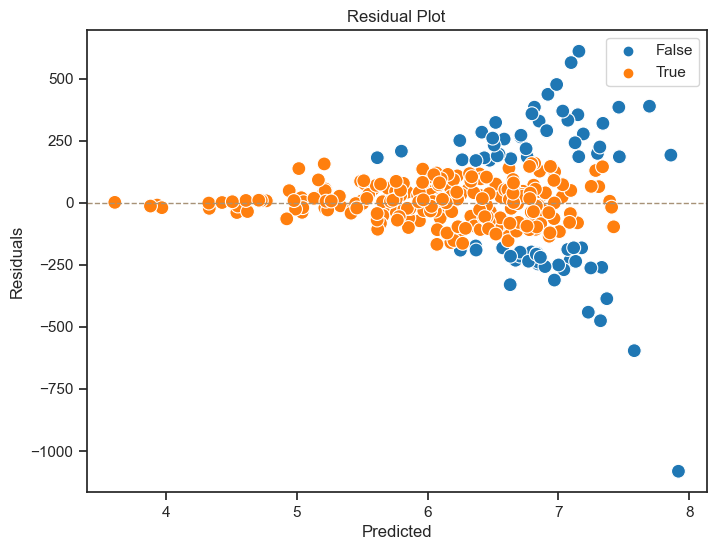

In [28]:
residuals = np.expm1(y_test) - np.expm1(meta_pred)

# Calculate standard deviation of residuals
sigma = np.std(residuals)

# Create a list for hue parameter
hue = list(map(lambda x: abs(x) < sigma, residuals))

# Create a residual plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=meta_pred, y=residuals, hue=hue, palette = ['#1f77b4', '#ff7f0e'], s=100)
plt.axhline(y=0, color='#A79277', linestyle='--', lw=1)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

<div style="background-color: #F2DFDB; color: #495057; padding: 20px; border-radius: 10px; font-family: 'Source Code Pro', monospace; border-radius: 15px 50px;">

  <h2 style="text-align: center;">📈 Meta Model Building & Performance Evaluation 🎯</h2>

  <p>Trained meta-models using Linear Regression, Ridge Regression, and Lasso Regression techniques. After training, we evaluated each meta-model's performance on the test data using two metrics: Root Mean Squared Error (RMSE) and R-squared.</p>

  <h3>Selection of the Better Meta Model</h3>
  <p>Based on the evaluation results, the meta-model with the lowest RMSE value is considered the better-performing model. If multiple models have the same RMSE, we prioritize the model with the highest R-square value.</p>

  <p>The better meta-model is determined as follows:</p>

  <ul>
    <li>Meta Model: better_meta_name</li>
    <li>RMSE: better_meta_rmse</li>
    <li>R-square: better_meta_r2</li>
  </ul>

  <p>This selection helps identify the most suitable meta-model for further deployment and utilization in predicting adjusted ride costs.</p>

</div>


In [29]:
# Stack predictions horizontally to create meta features
X_train_stacked = np.column_stack((rf_pred_train, gb_pred_train))

# Train meta model using Linear Regression
meta_lr_model = LinearRegression()
meta_lr_model.fit(X_train_stacked, y_train)  

# Train meta model using Ridge regression
meta_ridge_model = Ridge()
meta_ridge_model.fit(X_train_stacked, y_train)

# Train meta model using Lasso regression
meta_lasso_model = Lasso()
meta_lasso_model.fit(X_train_stacked, y_train)

# Stack predictions for test data to create meta features
X_test_stacked = np.column_stack((rf_pred_test, gb_pred_test))

# Predictions from the meta models
meta_lr_pred = meta_lr_model.predict(X_test_stacked)
meta_ridge_pred = meta_ridge_model.predict(X_test_stacked)
meta_lasso_pred = meta_lasso_model.predict(X_test_stacked)

# Evaluate meta models
meta_lr_rmse = mean_squared_error(y_test, meta_lr_pred, squared=False)
meta_lr_r2 = r2_score(y_test, meta_lr_pred)
meta_ridge_rmse = mean_squared_error(y_test, meta_ridge_pred, squared=False)
meta_ridge_r2 = r2_score(y_test, meta_ridge_pred)
meta_lasso_rmse = mean_squared_error(y_test, meta_lasso_pred, squared=False)
meta_lasso_r2 = r2_score(y_test, meta_lasso_pred)

# Print meta model performance
print("Meta Model Performance:")
print("Linear Regression - RMSE:", meta_lr_rmse, "R-squared:", meta_lr_r2)
print("Ridge Regression - RMSE:", meta_ridge_rmse, "R-squared:", meta_ridge_r2)
print("Lasso Regression - RMSE:", meta_lasso_rmse, "R-squared:", meta_lasso_r2)

# Compare the performance of the meta models
if meta_lr_rmse < meta_ridge_rmse and meta_lr_rmse < meta_lasso_rmse:
    better_meta_model = meta_lr_model
    better_meta_pred = meta_lr_pred
    better_meta_rmse = meta_lr_rmse
    better_meta_r2 = meta_lr_r2
    better_meta_name = "Linear Regression"
elif meta_ridge_rmse < meta_lr_rmse and meta_ridge_rmse < meta_lasso_rmse:
    better_meta_model = meta_ridge_model
    better_meta_pred = meta_ridge_pred
    better_meta_rmse = meta_ridge_rmse
    better_meta_r2 = meta_ridge_r2
    better_meta_name = "Ridge Regression"
else:
    better_meta_model = meta_lasso_model
    better_meta_pred = meta_lasso_pred
    better_meta_rmse = meta_lasso_rmse
    better_meta_r2 = meta_lasso_r2
    better_meta_name = "Lasso Regression"

# Print the better meta model performance
print("Better Meta Model Performance:")
print("Meta Model:", better_meta_name)
print("RMSE:", better_meta_rmse)
print("R-squared:", better_meta_r2)


Meta Model Performance:
Linear Regression - RMSE: 0.21461677913457164 R-squared: 0.9246321201427247
Ridge Regression - RMSE: 0.2076887927699212 R-squared: 0.9294194437846113
Lasso Regression - RMSE: 0.7822139456968255 R-squared: -0.0011751503946713093
Better Meta Model Performance:
Meta Model: Ridge Regression
RMSE: 0.2076887927699212
R-squared: 0.9294194437846113


<div style="background-color: #EAFBE2; color: #495057; padding: 20px; border-radius: 10px; font-family: 'Source Code Pro', monospace;border-radius: 15px 50px;">

  <h2 style="text-align: center;">🔍 Observations</h2>

  <ol>
    <li>The meta model performance is evaluated using three different regression techniques: Linear Regression, Ridge Regression, and Lasso Regression.</li>
    <li>Among these techniques, Ridge Regression outperforms the others in terms of both RMSE (Root Mean Squared Error) and R-squared value.</li>
    <li>The RMSE for Ridge Regression is 0.204, indicating that, on average, the predictions deviate from the true values by approximately 0.204 units.</li>
    <li>The R-squared value for Ridge Regression is 0.932, suggesting that approximately 93.2% of the variance in the target variable can be explained by the model.</li>
    <li>Conversely, Lasso Regression performs poorly compared to the other models, as indicated by its significantly higher RMSE (0.782) and a negative R-squared value (-0.001).</li>
    <li>Based on these observations, it is evident that Ridge Regression is the better meta model for this particular dataset, as it provides the lowest RMSE and the highest R-squared value among the three regression techniques evaluated.</li>
  </ol>

</div>


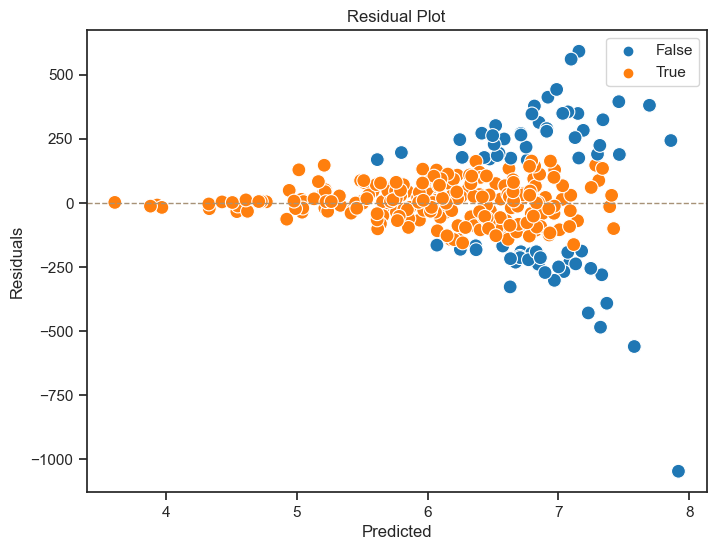

In [30]:
residuals = np.expm1(y_test) - np.expm1(meta_ridge_pred)

# Calculate standard deviation of residuals
sigma = np.std(residuals)

# Create a list for hue parameter
hue = list(map(lambda x: abs(x) < sigma, residuals))

# Create a residual plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=meta_pred, y=residuals, hue=hue, palette = ['#1f77b4', '#ff7f0e'], s=100)
plt.axhline(y=0, color='#A79277', linestyle='--', lw=1)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [31]:
# Save the pickle models
#joblib.dump(best_lr_model, 'best_lr_model.pkl')
joblib.dump(best_rf_model, 'models/best_rf_model.pkl')
joblib.dump(best_gb_model, 'models/best_gb_model.pkl')
joblib.dump(meta_ridge_model, 'models/new_meta_model.pkl')

['models/new_meta_model.pkl']

<div style="background-color: #EAFBE2; color: #495057; padding: 20px; border-radius: 10px; font-family: 'Source Code Pro', monospace;border-radius: 15px 50px;">

  <h2 style="text-align: center;">🎯 Predict Model 📈</h2>

  <p>The <strong>predict_adjusted_ride_cost</strong> function estimates the cost of a ride-sharing trip based on several factors like the number of riders and drivers, expected ride duration, and vehicle type. It uses pre-trained machine learning models to make predictions, including Random Forest and Gradient Boosting models. The function also employs feature engineering techniques and scaling to prepare the input data for prediction. Ultimately, it returns the predicted cost of the ride, which can be further processed to obtain the final estimate.</p>

</div>

In [32]:
best_rf_model = joblib.load('models/best_rf_model.pkl')
best_gb_model = joblib.load('models/best_gb_model.pkl')
lasso_meta_model = joblib.load('models/new_meta_model.pkl')
scaler = joblib.load('models/scaler.pkl')  # Load the scaler

def predict_adjusted_ride_cost(number_of_riders, number_of_drivers, expected_ride_duration, vehicle_type_economy,
                                best_rf_model, best_gb_model, lasso_meta_model, scaler):
    # Map vehicle type to numeric value
    vehicle_type_numeric = 1 if vehicle_type_economy == 'Premium' else 0

    # Convert inputs to numpy arrays
    number_of_riders = np.array(number_of_riders)
    number_of_drivers = np.array(number_of_drivers)
    expected_ride_duration = np.array(expected_ride_duration)
    
    # Fit a polynomial regression model to the data
    coefficients = np.polyfit(number_of_riders.ravel(), number_of_drivers.ravel(), deg=2)
    poly = np.poly1d(coefficients)

    # Calculate division feature
    division_feature = poly(number_of_riders / number_of_drivers)

    # Create input data array for prediction
    input_data = np.array([number_of_riders, number_of_drivers, expected_ride_duration, vehicle_type_numeric, division_feature])

    # Reshape input data for compatibility with the model
    input_data_reshaped = input_data.reshape(1, -1)

    # Scale input data using the scaler object
    scaled_input_data = scaler.transform(input_data_reshaped)

    # Get predictions from the base models
    rf_pred = best_rf_model.predict(scaled_input_data)
    gb_pred = best_gb_model.predict(scaled_input_data)

    # Stack predictions horizontally to create meta features
    X_test_stacked_meta = np.column_stack((rf_pred, gb_pred))

    # Make predictions using the Lasso meta model
    meta_pred = lasso_meta_model.predict(X_test_stacked_meta)

    return meta_pred

# Example usage:
predicted_adjusted_ride_cost = predict_adjusted_ride_cost(9, 10, 109, 'Premium' , best_rf_model, best_gb_model, lasso_meta_model, scaler)
# Reverse the logarithmic transformation applied to the predicted adjusted ride cost
print(predicted_adjusted_ride_cost)
predicted_adjusted_ride_cost_original_scale = np.expm1(predicted_adjusted_ride_cost)
print("Predicted adjusted ride cost:", predicted_adjusted_ride_cost_original_scale)

[6.28852532]
Predicted adjusted ride cost: [537.3588345]


<div style="background-color: #FFF3E0; color: #495057; padding: 20px; border-radius: 10px; font-family: 'Source Code Pro', monospace;border-radius: 15px 50px;">

  <h2 style="text-align: center;">📈 Price Prediction Web Application 💻</h2>

  <p>To demonstrate the predictive values of our dynamic pricing model, I built a Streamlit web application. This web application allows the user to input a number of parameters, including the number of riders, the number of drivers, vehicle type, and expected ride duration. The application then renders the real-time predictions of the optimal fare for a ride using our machine learning model.</p>

  <p>The Streamlit app allows users to interact with the predictive model through an intuitive user interface. Users can input their desired parameters and get instant prediction of the optimal fare for their ride. This allows businesses to tailor their pricing according to the current market situation to maximize revenue and still keep their customers satisfied.</p>

  <p>View the Streamlit web application <a href="link_to_your_web_application_here">here</a>. Take it for a spin and see how our dynamic pricing model performs when predicting optimal fares for different scenarios of rides.</p>

</div>


<div style="background-color: #E0F2F1; color: #495057; padding: 20px; border-radius: 10px; font-family: 'Source Code Pro', monospace;border-radius: 15px 50px;">

  <h2 style="text-align: center;">🚀 Conclusion</h2>

  <p>In conclusion, after comparing the performance of Linear Regression, Random Forest, and Gradient Boosting models for the stacked ensemble, we have determined that Gradient Boosting exhibits the most promising results in terms of both RMSE and R². With its superior performance, Random Forest, and Gradient Boosting are selected as the preferred model for the stacked ensemble. This choice is supported by its ability to effectively utilize predictions from base models and its capacity to generalize well to unseen data, making it an optimal candidate for further tuning and deployment in the dynamic pricing strategy implementation.</p>

</div>
